In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names= ['label','text'])

In [26]:
!pip install nltk

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivamdubey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivamdubey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.tokenize import word_tokenize

In [30]:
from nltk.corpus import stopwords

In [31]:
swords = stopwords.words('english')

In [32]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [33]:
sent = 'Hello friends! How are you? We will be learning Python today.'

In [34]:
def clean_text(sent):
    tokens = word_tokenize(sent)
    clean = [word for word in tokens 
             if word.isdigit() or word.isalpha()]
    clean = [ps.stem(word) for word in clean if word not in swords]
    return(clean)

In [35]:
clean_text(sent)

['hello', 'friend', 'how', 'we', 'learn', 'python', 'today']

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
tfidf = TfidfVectorizer(analyzer = clean_text)

In [72]:
x = df['text']
y = df['label']

In [73]:
x_new = tfidf.fit_transform(x)

In [100]:
tfidf.get_feature_names()

/Users/shivamdubey/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['0',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '050703',
 '0578',
 '06',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '07786200117',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07973788240',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '0870',
 '08701213186',
 '08701237397',
 '08701417012',
 '087016248',
 '08701752560',
 '087018728737',
 '0870241182716',
 '08702490080',
 '08702840625',
 '08704439680

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train , x_test , y_train , y_test = train_test_split(x_new,y , random_state=0 , test_size=0.25)

In [103]:
from sklearn.naive_bayes import GaussianNB

In [104]:
nb = GaussianNB()

In [105]:
nb.fit(x_train.toarray(),y_train)

GaussianNB()

In [106]:
y_pred = nb.predict(x_test.toarray())

In [107]:
y_test.value_counts()

ham     1208
spam     185
Name: label, dtype: int64

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay

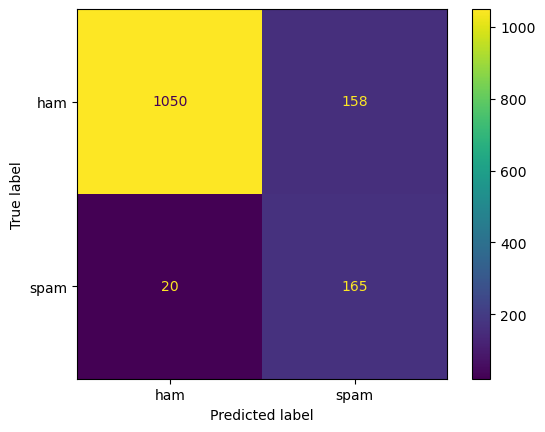

In [109]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)

In [110]:
from sklearn.metrics import accuracy_score , classification_report

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [112]:
accuracy_score(y_test,y_pred)

0.8722182340272793

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf = RandomForestClassifier(random_state=0)

In [115]:
rf.fit(x_train , y_train)

RandomForestClassifier(random_state=0)

In [116]:
y_pred = rf.predict(x_test)

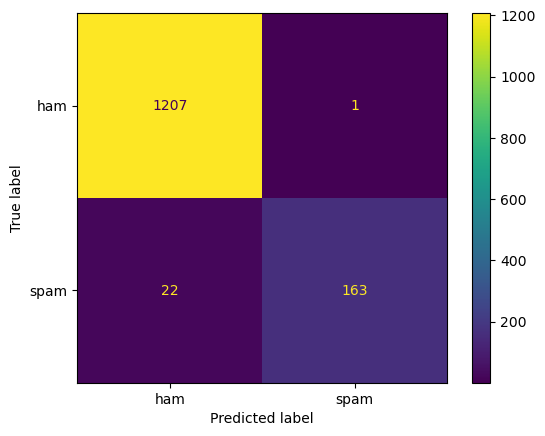

In [117]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [119]:
accuracy_score(y_test,y_pred)

0.9834888729361091

In [120]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
accuracy_score(y_test,y_pred)

0.9641062455132807

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
params = {
    'criterion' : ['gini','entropy'],
    'max_features' : ['sqrt','log2'],
    'random state' : [0,1,2,3,4] ,
    'class_weight' : ['balanced' , 'balanced_subsample']
}

In [123]:
grid = GridSearchCV(rf,param_grid=params , cv = 5, scoring='accuracy')

In [124]:
y_pred = rf.predict(x_test)

In [125]:
accuracy_score(y_test , y_pred)

0.9834888729361091